In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
chunk = pd.read_csv('/content/drive/MyDrive/dataset/train.csv',chunksize=1000000)
df = pd.concat(chunk)

In [ ]:
df.head(10) #total size of training data = 2M approx
df_dum=df.copy()
df['TITLE'].isna().sum(),df['BULLET_POINTS'].isna().sum(),df['DESCRIPTION'].isna().sum()
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [ ]:
df[['TITLE','DESCRIPTION','BULLET_POINTS']]

,TITLE,DESCRIPTION,BULLET_POINTS
0,ArtzFolio Tulip Flowers Blackout Curtain for D...,NaN,[LUXURIOUS & APPEALING: Beautiful custom-made ...
1,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,NaN,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c..."
2,PRIKNIK Horn Red Electric Air Horn Compressor ...,"Specifications: Color: Red, Material: Aluminiu...","[Loud Dual Tone Trumpet Horn, Compatible With ..."
3,ALISHAH Women's Cotton Ankle Length Leggings C...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,[Made By 95%cotton and 5% Lycra which gives yo...
4,The United Empire Loyalists: A Chronicle of th...,NaN,NaN
...,...,...,...
2249693,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,NaN,Material : Polyester
2249694,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,[❤ [Inspiration] Inspired by the Untitled Goos...
2249695,Kangroo Sweep Movement Printed Wooden Wall Clo...,Wall Clocks Are Very Attractive In Looks And E...,"[Dial size: 12 inches in diameter,Big, clear r..."
2249696,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN


In [ ]:
df[['TITLE','PRODUCT_TYPE_ID', 'PRODUCT_LENGTH']].sort_values('PRODUCT_TYPE_ID')

,TITLE,PRODUCT_TYPE_ID,PRODUCT_LENGTH
414249,"Glimmies Aquaria â€“ Medusilla, Gla00G",0,433.070866
1970362,JerrisApparel Snow Party Dress Queen Costume P...,0,1350.000000
927226,"SJT Enterprises 5"" x 10"" Footprints in the San...",0,500.000000
1587085,Hi-Chew Sticks Tropical Assorted 7 Flavors Plu...,0,637.000000
927231,Ignition Keys Switch Lock Cylinder Steering Fi...,0,669.000000
...,...,...,...
674515,NBA Houston Rockets Women's Team Logo Fleece P...,13420,600.000000
2031521,"prAna Alberta Reversible Sweater, Small, Black",13420,1500.000000
531931,"Puma Golf Women's 2019 Brisk Hoodie, Indigo He...",13420,1550.000000
387179,"Softwear Apparel Pullover, Forest Green, Small",13420,500.000000


In [ ]:
df.reset_index(drop=True, inplace=True)
df_dum = df;
df_dum=df_dum[df_dum['PRODUCT_LENGTH']<5000]
# df_dum.drop(['PRODUCT_ID'], inplace=True, axis=1)
# df[df["TITLE"]=='Casotec Back Cover for Mobile (Plastic_Multicolor)']
# df_dum.duplicated().sum()
# (df_dum['TITLE'].value_counts().tolist())
df_dum.drop_duplicates(subset=['TITLE'], inplace=True, keep='first')

<ipython-input-8-1b6f6c9a71ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dum.drop_duplicates(subset=['TITLE'], inplace=True, keep='first')


In [ ]:
# (df_dum['TITLE'].value_counts().tolist())

In [ ]:
np.argmax(df['PRODUCT_LENGTH'])
df[['TITLE', 'PRODUCT_LENGTH']].sort_values('PRODUCT_LENGTH', ascending=False)
np.sum(df['PRODUCT_LENGTH']>5000)

75232

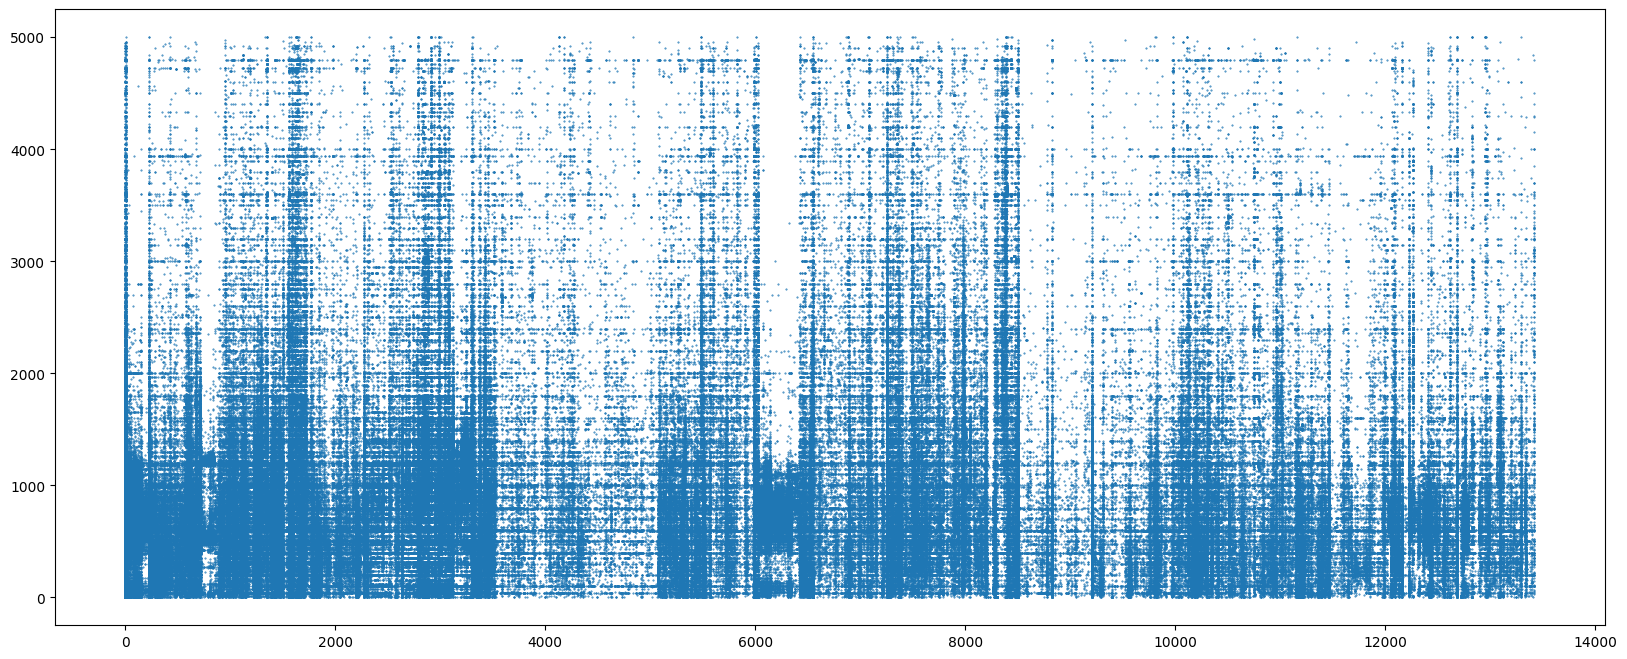

In [ ]:
from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform([df['PRODUCT_LENGTH']])
# y= StandardScaler().fit_transform([df['PRODUCT_ID']])
x=df_dum['PRODUCT_LENGTH']
y=df_dum['PRODUCT_TYPE_ID']
xx = x[x < 5000]
yy = y[x < 5000]
plt.figure(figsize=(20, 8))
plt.scatter(yy,xx, s=0.2 )
# plt.xlim(right=10000)

In [ ]:
plt.figure(figsize=(20, 8))
# plt.hist(df_dum[df_dum['PRODUCT_LENGTH']>2000].PRODUCT_LENGTH, bins=50)
plt.hist(df_dum[df_dum['PRODUCT_LENGTH']<2650].PRODUCT_LENGTH, bins=50)
np.sum(df['PRODUCT_LENGTH']>2650)


In [ ]:
df_dum=df_dum[df_dum['PRODUCT_LENGTH']<5000]

(array([556366.,  26960.,  56712.,  28659.,  43736.,  91497.,  57068.,
         10179.,  59736.,  19924., 136356., 133135., 145014.,   7886.,
          3111.,   5464.,   3593.,   2732.,   4389.,  20194.,  29727.,
         13992., 115136.,  40217.,  32892.,   8419.,  14227.,  61684.,
         24423.,  20163.,  13696.,  37524.,   4988.,    937.,  10257.,
          5253.,   7828.,  19677.,  20939.,  10478.,  11284.,  14827.,
         13341.,   5654.,  76802.,  24063.,  38419.,  28776.,  10748.,
          6599.]),
 array([    0. ,   268.4,   536.8,   805.2,  1073.6,  1342. ,  1610.4,
         1878.8,  2147.2,  2415.6,  2684. ,  2952.4,  3220.8,  3489.2,
         3757.6,  4026. ,  4294.4,  4562.8,  4831.2,  5099.6,  5368. ,
         5636.4,  5904.8,  6173.2,  6441.6,  6710. ,  6978.4,  7246.8,
         7515.2,  7783.6,  8052. ,  8320.4,  8588.8,  8857.2,  9125.6,
         9394. ,  9662.4,  9930.8, 10199.2, 10467.6, 10736. , 11004.4,
        11272.8, 11541.2, 11809.6, 12078. , 12346.4, 12614

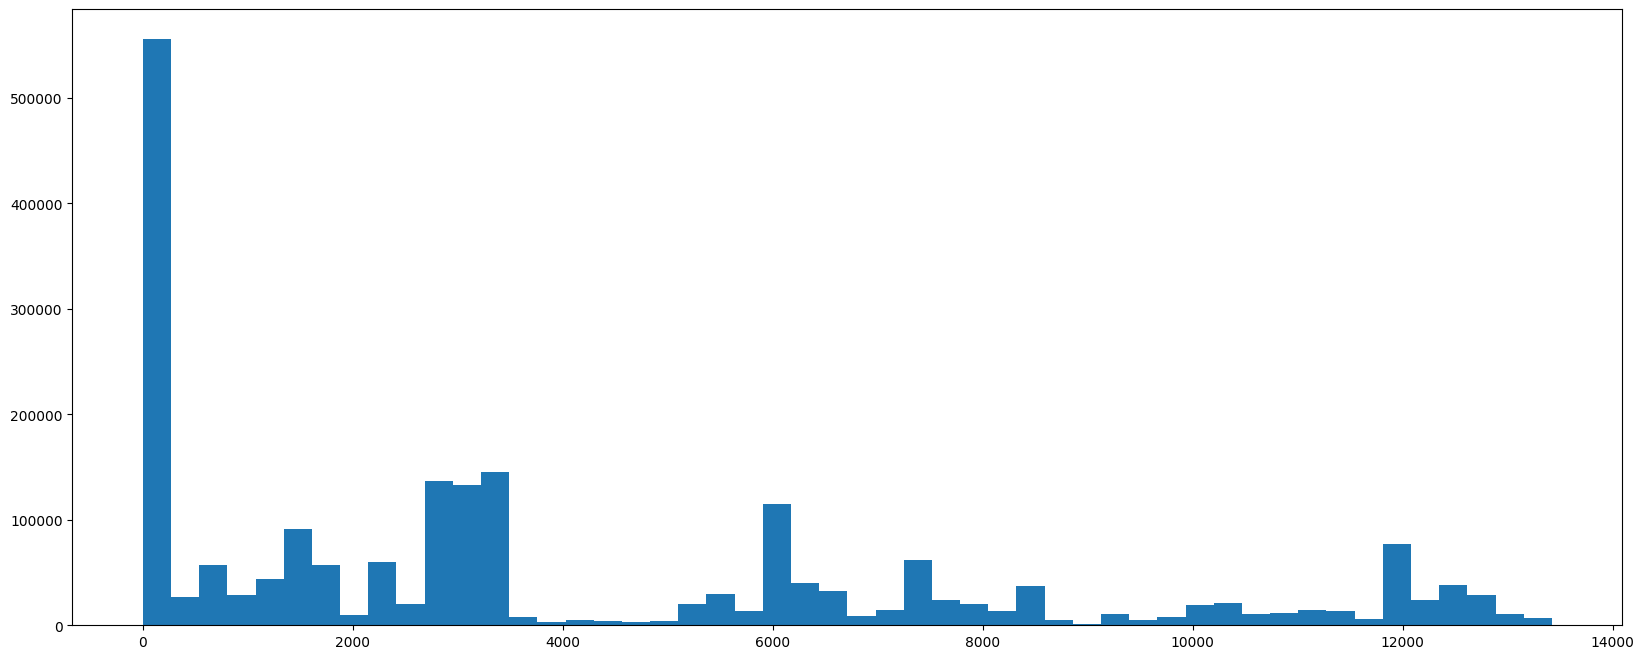

In [ ]:
plt.figure(figsize=(20, 8))
plt.hist(df_dum.PRODUCT_TYPE_ID, bins=50)

In [ ]:
arr=df_dum['BULLET_POINTS'][0]
df_dum['BULLET_POINTS'].fillna("!", inplace = True)
df_dum['BULLET_POINTS']=df_dum['BULLET_POINTS'].apply(lambda x: x[1:-1].split(',') if  x[0]=='[' else x.split(','))

df_dum[['BULLET_POINTS']]

,BULLET_POINTS
0,[LUXURIOUS & APPEALING: Beautiful custom-made ...
1,"[Harry Potter Hedwig Pyjamas (6-16 Yrs), 100% ..."
2,"[Loud Dual Tone Trumpet Horn, Compatible With..."
3,[Made By 95%cotton and 5% Lycra which gives yo...
4,[!]
...,...
2249693,[Material : Polyester]
2249694,[❤ [Inspiration] Inspired by the Untitled Goos...
2249695,"[Dial size: 12 inches in diameter, Big, clear..."
2249696,[!]


In [ ]:
df_dum['Text'] = df_dum['TITLE']
bullet_info = [" ".join([ele if any([x in ele.lower() for x in ['material','size']]) else ""  for ele in item]).strip() for item in df_dum['BULLET_POINTS']]
bullet_info

['MATERIAL: Luxurious & versatile fabric with a natural finish | High colour fastness | State-of-the-art digital printing ensures colour consistency and prevents any fading | Eyelets; Cotton Canvas; Width 4.5feet (54inch) | Multicolour | PACKAGE: 2 Room Curtains Eyelets | SIZE: Height 5 feet (60 inch); SET OF 2 PCS',
 '',
 '',
 '',
 '',
 'High Quality - Both Indoor/outdoor planter stand and flower pots are made of wrought iron material',
 '',
 'HIGH QUALITY PVC MATERIAL: The kitchen aluminum foil stickers are made from plastic and aluminum foil    and Eco-friendly PVC materials is safe enough to use in Kitchen.     anti-moisture PVC material allows you to wipe stains easily. EASY CUT AND TRIM: back cut-to-fit grid lines design of the self-adhesive kitchen oil proof sticker is convenient for you to cut and trim any size you want. This silver rhombus texture add more fashion to your kitchen decor.',
 'Upper Material:-Leather Lower Material:-Rubber',
 '',
 '',
 '',
 '',
 '',
 "gym or just

In [ ]:
df_dum['Bullet_Info'] = bullet_info
df_dum['Text'] = df_dum['Text'].astype(str) + " " + df_dum['Bullet_Info']+ " " + df_dum['PRODUCT_TYPE_ID'].map(str)
df_dum['Text']=df_dum['Text'].apply(lambda x: x.lower())

In [ ]:
df_dum[['Text']]

,Text
0,artzfolio tulip flowers blackout curtain for d...
1,marks & spencer girls' pyjama sets t86_2561c_n...
2,priknik horn red electric air horn compressor ...
3,alishah women's cotton ankle length leggings c...
4,the united empire loyalists: a chronicle of th...
...,...
2249692,olmeo 14 led round fog light 4 inches waterpro...
2249693,nike women's as w ny df swsh hn kh bra (cz7610...
2249694,"(3pcs) goose game cute cartoon enamel pins, fu..."
2249695,kangroo sweep movement printed wooden wall clo...


In [ ]:
df_dum['Text'] = df_dum['Text'].astype(str) + df_dum["PRODUCT_TYPE_ID"].astype(str)
pd.DataFrame(df_dum['Text']).to_parquet('/content/drive/MyDrive/tf models/final_text.parquet', compression='GZIP')

(array([1.251543e+06, 5.163370e+05, 1.608610e+05, 7.529600e+04,
        3.337500e+04, 1.486200e+04, 7.023000e+03, 3.775000e+03,
        2.618000e+03, 1.088000e+03, 5.410000e+02, 3.970000e+02,
        1.970000e+02, 1.440000e+02, 1.260000e+02, 1.400000e+02,
        1.150000e+02, 1.000000e+02, 5.700000e+01, 4.100000e+01,
        5.900000e+01, 1.100000e+02, 9.400000e+01, 4.700000e+01,
        3.600000e+01, 5.400000e+01, 7.500000e+01, 5.300000e+01,
        6.300000e+01, 3.000000e+01, 4.000000e+00, 2.000000e+00,
        2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  2.  ,  17.28,  32.56,  47.84,  63.12,  78.4 ,  93.68, 108.96,
        124.24, 139.52, 154.8 , 170.08, 185.36, 200.64, 215.92, 231.2 ,
        246.48, 261.76, 277.04, 292.32, 307.6 , 32

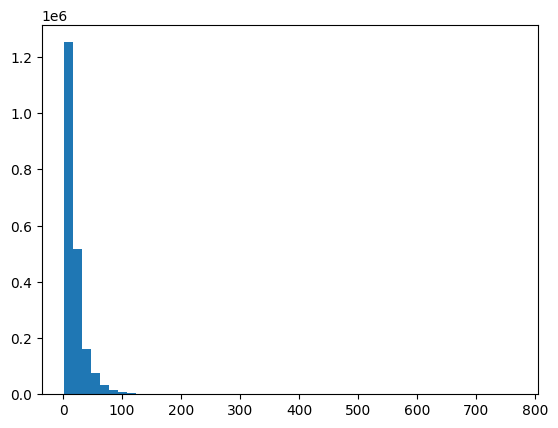

In [ ]:
plt.hist((df_dum['Text'].apply(lambda x:len(x.split()) )), bins=50)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_dum['Text'] = df_dum['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_dum[['Text','PRODUCT_LENGTH', 'TITLE']].to_parquet("/content/drive/MyDrive/tf models/final_text(1).parquet")

In [ ]:
tf.data.Dataset.from_tensor_slices(df_dum['Text'])
max_features=8000
max_len = 120
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=max_features,
 output_mode='int',
 output_sequence_length=max_len)


In [ ]:
vectorize_layer.adapt(tf.data.Dataset.from_tensor_slices(df_dum['Text']).batch(1024))


In [ ]:
vectorize_layer.get_vocabulary()

In [ ]:
# Create model.
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Save.

model.save("/content/drive/MyDrive/tf models/text-vectorizer.tf")

#Building and Training our Model

In [ ]:
# %pip install -q -U keras-tuner
# import keras_tuner as kt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/tf models/text-vectorizer.tf")
loaded_vectorizer = loaded_model.layers[0]

In [ ]:
# df_dum.drop_duplicates(subset=['TITLE'], inplace=True, keep='first')
# df_dum1=df_dum[df_dum['PRODUCT_LENGTH']<5000]
# df_dum1['Title_in'] = df_dum['TITLE']
# df_dum1['Title_in']

In [ ]:
df_dum = pd.read_parquet('/content/drive/MyDrive/tf models/final_text(1).parquet')
# df_dum = pd.concat(chunk)
df_dum = df_dum.sample(frac=1).reset_index(drop=True)


In [ ]:
X_train = tf.constant(df_dum['Text'][:1800_000] )
X_valid = tf.constant(df_dum['Text'][1800_000:])
y_train = tf.constant(df_dum['PRODUCT_LENGTH'][:1800_000])
y_valid = tf.constant(df_dum['PRODUCT_LENGTH'][1800_000:])

# tf.random.shuffle((X_train , y_train))

In [ ]:
dropout_=0.2
n_neurons=300
embed_size = 200

model_sequential = tf.keras.Sequential([
    loaded_vectorizer,
    tf.keras.layers.Embedding(8000, embed_size, mask_zero=True),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(n_neurons, return_sequences=True)),

    tf.keras.layers.GRU(n_neurons, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GRU(n_neurons, return_sequences=True),
    # tf.keras.layers.Dropout(dropout_),
    tf.keras.layers.GRU(n_neurons, return_sequences=True),
    # tf.keras.layers.LSTM(n_neurons),
    tf.keras.layers.LSTM(n_neurons),
    tf.keras.layers.Dense(n_neurons, activation='relu', kernel_initializer='he_normal'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_neurons, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(dropout_),
    tf.keras.layers.Dense(1, activation='relu')

])

model_ckpt = tf.keras.callbacks.ModelCheckpoint(
"my_model", monitor="val_mae", save_best_only=True)

model_sequential.compile(loss="mean_absolute_percentage_error", optimizer = 'nadam',  metrics=["mae"])

In [ ]:
history = model_sequential.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[model_ckpt], epochs=3, batch_size=1500 )

Epoch 1/3
1200/1200 [==============================] - ETA: 0s - loss: 77.3353 - mae: 616.6980

1200/1200 [==============================] - 500s 399ms/step - loss: 77.3353 - mae: 616.6980 - val_loss: 68.9704 - val_mae: 554.6072
Epoch 2/3
1200/1200 [==============================] - ETA: 0s - loss: 65.7844 - mae: 525.2835

1200/1200 [==============================] - 459s 383ms/step - loss: 65.7844 - mae: 525.2835 - val_loss: 68.3584 - val_mae: 476.3478
Epoch 3/3
1200/1200 [==============================] - ETA: 0s - loss: 61.5178 - mae: 491.8214

1200/1200 [==============================] - 456s 380ms/step - loss: 61.5178 - mae: 491.8214 - val_loss: 63.9695 - val_mae: 454.5301


In [ ]:
history.history
model_sequential.save("/content/drive/MyDrive/sequential_model_different6")

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")


In [ ]:
df_test['BULLET_POINTS'].fillna("!", inplace = True)
df_test['BULLET_POINTS']=df_test['BULLET_POINTS'].apply(lambda x: x[1:-1].split(',') if  x[0]=='[' else x.split(','))

df_test['bullet_info'] = [" ".join([ele if any([x in ele.lower() for x in ['material','size']]) else ""  for ele in item]).strip() for item in df_test['BULLET_POINTS']]
df_test['Text'] = df_test['TITLE'].astype(str) + df_test['bullet_info'] + " " + df_test['PRODUCT_TYPE_ID'].map(str)
df_test['Text']=df_test['Text'].apply(lambda x: x.lower())

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_test['Text'] = df_test['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_test = tf.constant(df_test['Text'])
y_preds = model_sequential.predict(X_test)

22961/22961 [==============================] - 374s 16ms/step


In [ ]:
y_preds = y_preds.squeeze()
y_preds

df_test['PRODUCT_LENGTH'] = y_preds
results = df_test[['PRODUCT_ID', 'PRODUCT_LENGTH']]
results.to_csv("/content/drive/MyDrive/ML hackathon-results-sequential-6.csv", index=False)

In [ ]:
model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 60)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 60, 200)           1600000   
                                                                 
 gru_3 (GRU)                 (None, 60, 300)           451800    
                                                                 
 batch_normalization_2 (Batc  (None, 60, 300)          1200      
 hNormalization)                                                 
                                                                 
 gru_4 (GRU)                 (None, 60, 300)           541800    
                                                                 
 gru_5 (GRU)                 (None, 60, 300)          